In [2]:
#Team number:5D12
#Title:Building insurance claim predition.
#Team: Suyog Bhat, Shreyas katagi, Shreevardhan Kamble, Shrinivas Miskin
#Problem statement: To predict if a building will have an insurance claim during a certain period.
#Link: https://challengedata.ens.fr/challenges/19

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
train_users = pd.read_csv('./X_train.csv')

In [5]:
print("In total we have", train_users.shape[0], "users.")

In total we have 10229 users.


In [6]:
users=train_users
users.head()

,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,18702,2014,1,0,V,N,1,O,1,...,IDENTIQUE,V,base,2,1351.0,4,2012.0,0.0,2,65440
1,1,3877,2014,1,0,V,V,V,V,V,...,V,N,base,2,1972.0,2,1980.0,0.0,.,14341
2,2,4942,2013,1,1,V,V,V,V,V,...,V,N,base,2,1630.0,4,NaN,0.0,.,75109
3,3,13428,2013,"0,246575342",0,N,V,V,V,V,...,V,N,base,2,532.0,3,NaN,0.0,.,92004
4,4,17137,2015,1,0,V,N,2,O,1,...,IDENTIQUE,V,base,2,1050.0,2,1972.0,0.0,4,59340


In [7]:
#NULL values
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0]

superficief     1.163359
ft_22_categ    12.083293
Insee           1.124255
dtype: float64

In [8]:
#convert EXPO int float replacing , by .
users['EXPO'] = [x.replace(',', '.') for x in users['EXPO']]
users['EXPO'] = users['EXPO'].astype(float)
users.EXPO.head()

0    1.000000
1    1.000000
2    1.000000
3    0.246575
4    1.000000
Name: EXPO, dtype: float64

In [9]:
#EXPO cannot be zero, it is period of insurance
sum(users.EXPO==0)

198

In [10]:
#zero replaced by NaN
users.loc[users.EXPO==0,'EXPO']=np.nan

In [11]:
#period less than a month
sum(users.EXPO<0.0833)

65

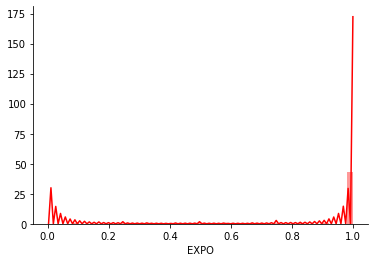

In [12]:
#period of insurance distribution
sns.distplot(users.EXPO.dropna(), color='red')
plt.xlabel('EXPO')
sns.despine()

In [13]:
#Another attr with NULL
users.ft_22_categ.head(10)

0    2012.0
1    1980.0
2       NaN
3       NaN
4    1972.0
5    1960.0
6    1960.0
7       NaN
8    1980.0
9    1972.0
Name: ft_22_categ, dtype: float64

In [14]:
#area of building
users.superficief.describe()

count    10110.000000
mean      1818.152918
std       2272.111284
min          1.000000
25%        500.000000
50%       1002.000000
75%       2190.000000
max      30745.000000
Name: superficief, dtype: float64

In [15]:
#area less than 5 m^2
print(sum(users.superficief<5))

8


In [16]:
#area greater than 7000 m^2
print(sum(users.superficief>7000))

358


In [17]:
users[users.superficief <5]['superficief'].describe()

count    8.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: superficief, dtype: float64

In [18]:
users[users.superficief >5000]['superficief'].describe()

count      701.000000
mean      8342.429387
std       3440.542994
min       5006.000000
25%       5885.000000
50%       7100.000000
75%       9999.000000
max      30745.000000
Name: superficief, dtype: float64

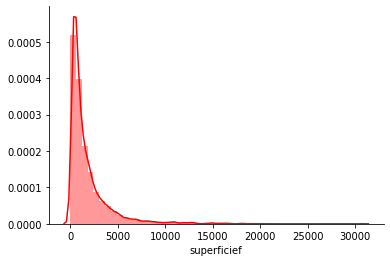

In [19]:
#area and count plot
sns.distplot(users.superficief.dropna(), color='red')
plt.xlabel('superficief')
sns.despine()

In [20]:
#less than 5 m^2 seems impossible
users.loc[users.superficief<5,'superficief']=np.nan

In [21]:
#interferable data looks like year
users.ft_22_categ.head()
#seems like building constructed year

0    2012.0
1    1980.0
2       NaN
3       NaN
4    1972.0
Name: ft_22_categ, dtype: float64

In [22]:
print("min")
print(min(users.ft_22_categ))
print("description")
users.ft_22_categ.describe()
#since max is 2016 definately its construction year

min
1545.0
description


count    8993.000000
mean     1965.061715
std        33.548619
min      1545.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

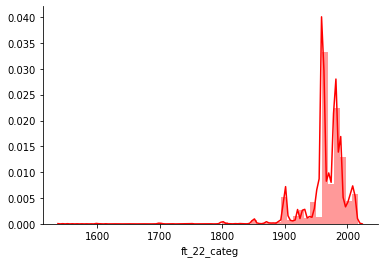

In [23]:
#year of construction
sns.distplot(users.ft_22_categ.dropna(), color='red')
plt.xlabel('ft_22_categ')
sns.despine()

In [24]:
users.columns

Index(['Unnamed: 0', 'Identifiant', 'ft_2_categ', 'EXPO', 'ft_4_categ',
       'ft_5_categ', 'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')

In [25]:
categorical_features = [
    'ft_4_categ',
       'ft_5_categ', 'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ',  'ft_21_categ','ft_23_categ', 'ft_24_categ'
  
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [26]:
users.head()

,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,18702,2014,1.000000,0,V,N,1,O,1,...,IDENTIQUE,V,base,2,1351.0,4,2012.0,0.0,2,65440
1,1,3877,2014,1.000000,0,V,V,V,V,V,...,V,N,base,2,1972.0,2,1980.0,0.0,.,14341
2,2,4942,2013,1.000000,1,V,V,V,V,V,...,V,N,base,2,1630.0,4,NaN,0.0,.,75109
3,3,13428,2013,0.246575,0,N,V,V,V,V,...,V,N,base,2,532.0,3,NaN,0.0,.,92004
4,4,17137,2015,1.000000,0,V,N,2,O,1,...,IDENTIQUE,V,base,2,1050.0,2,1972.0,0.0,4,59340


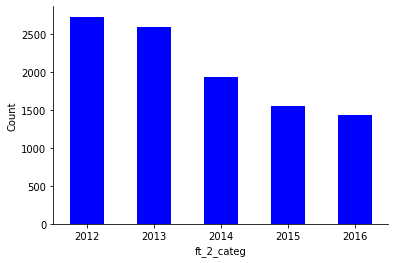

In [27]:
#number of insurance in observed year
users.ft_2_categ.value_counts(dropna=False).plot(kind='bar',color='blue',rot=0)
plt.xlabel('ft_2_categ')
plt.ylabel('Count')
sns.despine()


In [28]:
res= pd.read_csv('./y_train_saegPGl.csv')
users['target']=res['target']
users.head()

,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,0,18702,2014,1.000000,0,V,N,1,O,1,...,V,base,2,1351.0,4,2012.0,0.0,2,65440,0
1,1,3877,2014,1.000000,0,V,V,V,V,V,...,N,base,2,1972.0,2,1980.0,0.0,.,14341,1
2,2,4942,2013,1.000000,1,V,V,V,V,V,...,N,base,2,1630.0,4,NaN,0.0,.,75109,0
3,3,13428,2013,0.246575,0,N,V,V,V,V,...,N,base,2,532.0,3,NaN,0.0,.,92004,0
4,4,17137,2015,1.000000,0,V,N,2,O,1,...,V,base,2,1050.0,2,1972.0,0.0,4,59340,0


In [29]:
#target variable is extracted
claimed=users.loc[users['target']==1]
claimed.head()

,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
1,1,3877,2014,1.000000,0,V,V,V,V,V,...,N,base,2,1972.0,2,1980.0,0.0,.,14341,1
5,5,7580,2016,1.000000,1,N,V,V,V,V,...,N,base,2,2039.0,2,1960.0,0.0,.,13206,1
18,18,1887,2016,0.997268,0,V,V,V,V,V,...,N,base,2,4035.0,2,1980.0,0.0,.,34032,1
24,24,17910,2015,1.000000,1,V,N,1,O,1,...,V,pi,2,850.0,3,1960.0,0.0,4,93055,1
32,32,15928,2013,0.378082,1,V,N,2,O,1,...,V,V,2,6486.0,2,1980.0,0.0,4,83070,1


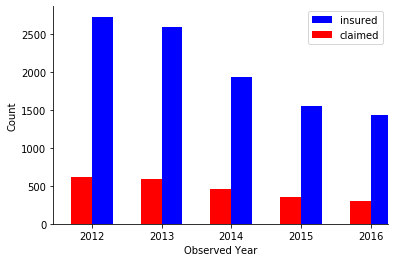

In [30]:
#claimed vs insured in observed yuear
users.ft_2_categ.value_counts(dropna=False).plot(kind='bar',width=0.3,position=0,label='insured',color='blue',rot=0)
claimed.ft_2_categ.value_counts(dropna=False).plot(kind='bar',width=0.3,position=1,label='claimed',color='red',rot=0)
plt.legend()
plt.xlabel('Observed Year')
plt.ylabel('Count')
sns.despine()


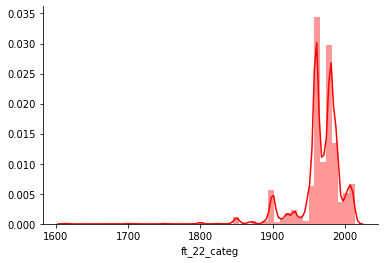

In [31]:
sns.distplot(claimed.ft_22_categ.dropna(), color='red')
plt.xlabel('ft_22_categ')
sns.despine()
#building which are constructed in later 1900 have higher claims which are constructed between 1950 to 2000 are volatile.

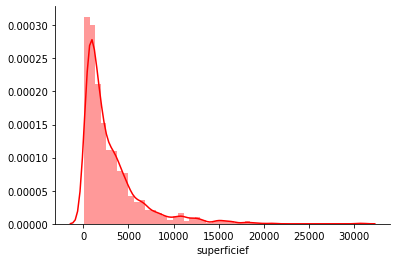

In [32]:
#area distribution of claimed
sns.distplot(claimed.superficief.dropna(), color='red')
plt.xlabel('superficief')
sns.despine()

In [33]:
print(sum(claimed.superficief>20000))

4


In [34]:
print(sum(claimed.superficief>30000))

2


In [35]:
users.EXPO.describe()
claimed.EXPO.describe()

count    2295.000000
mean        0.964181
std         0.132161
min         0.032787
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: EXPO, dtype: float64

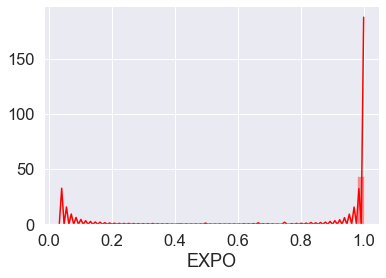

In [61]:
sns.distplot(claimed.EXPO.dropna(), color='red')
plt.xlabel('EXPO')
sns.despine()

In [37]:
claimed.EXPO.min()

0.032786885

In [38]:
users.EXPO.min()

0.00273224

Categorical values which are not specified.
Graph interpretations.

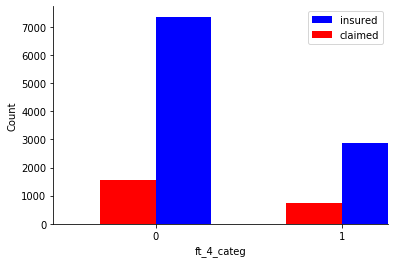

In [39]:
users.ft_4_categ.value_counts(dropna=False).plot(kind='bar',width=0.3,position=0,label='insured',color='blue',rot=0)
claimed.ft_4_categ.value_counts(dropna=False).plot(kind='bar',width=0.3,position=1,label='claimed',color='red',rot=0)
plt.legend()
plt.xlabel('ft_4_categ')
plt.ylabel('Count')
sns.despine()

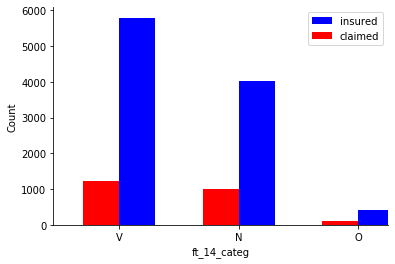

In [40]:
users.ft_14_categ.value_counts(dropna=False).plot(kind='bar',width=0.3,position=0,label='insured',color='blue',rot=0)
claimed.ft_14_categ.value_counts(dropna=False).plot(kind='bar',width=0.3,position=1,label='claimed',color='red',rot=0)
plt.legend()
plt.xlabel('ft_14_categ')
plt.ylabel('Count')
sns.despine()
#for boath V anjd N category claim rate is same

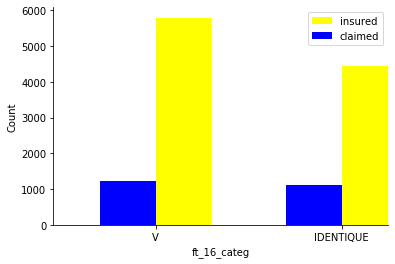

In [41]:
users.ft_16_categ.value_counts(dropna=False).plot(kind='bar',width=0.3,position=0,label='insured',color='yellow',rot=0)
claimed.ft_16_categ.value_counts(dropna=False).plot(kind='bar',width=0.3,position=1,label='claimed',color='blue',rot=0)
plt.legend()
plt.xlabel('ft_16_categ')
plt.ylabel('Count')
sns.despine()
# both categorical values contribute same

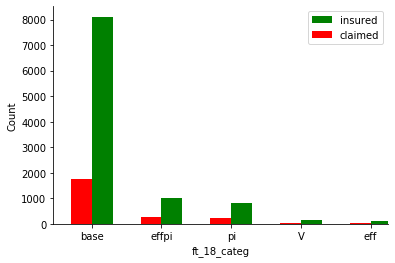

In [42]:
users.ft_18_categ.value_counts(dropna=False).plot(kind='bar',width=0.3,position=0,label='insured',color='green',rot=0)
claimed.ft_18_categ.value_counts(dropna=False).plot(kind='bar',width=0.3,position=1,label='claimed',color='red',rot=0)
plt.legend()
plt.xlabel('ft_18_categ')
plt.ylabel('Count')
sns.despine()

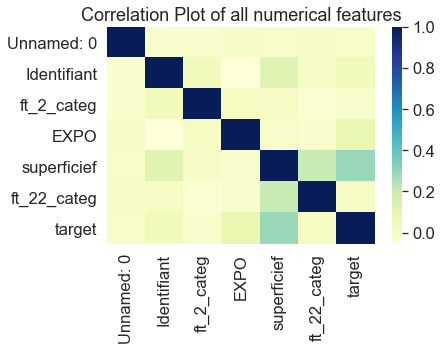

In [43]:
train_correlation = users.corr()

sns.set(font_scale = 1.5)

sns.heatmap(train_correlation,cmap="YlGnBu")
plt.title('Correlation Plot of all numerical features')
plt.show()
#least coreelated

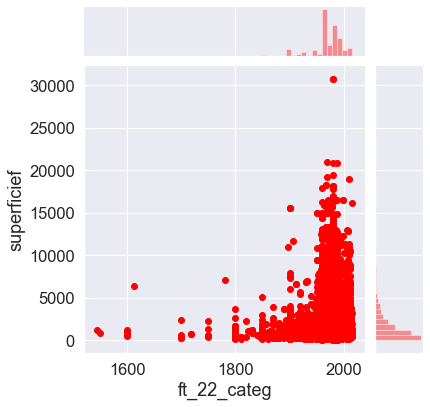

In [44]:
sns.jointplot(users.ft_22_categ,users.superficief ,color='red')
#building size increasing in later years.

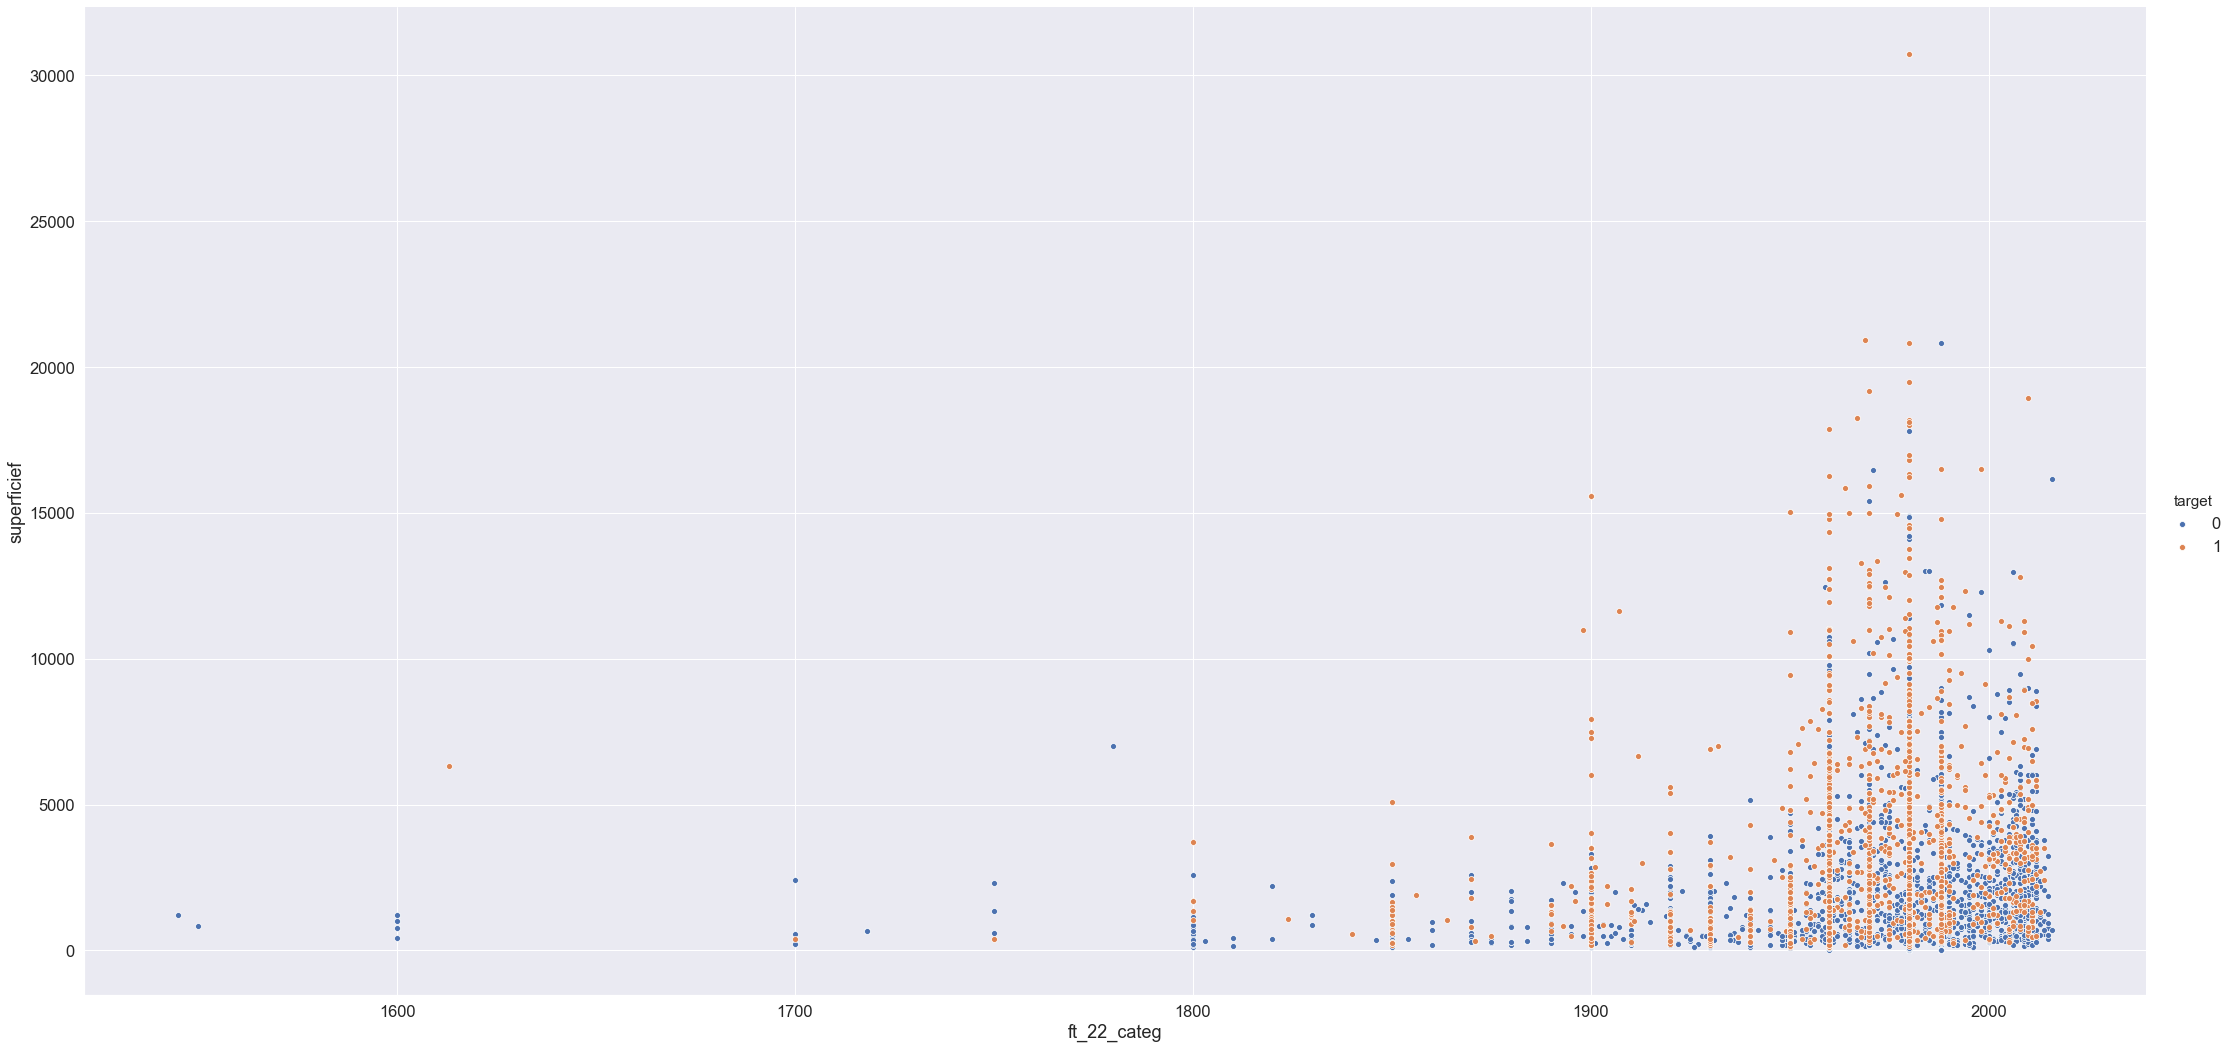

In [45]:
sns.pairplot(users,x_vars="ft_22_categ",y_vars="superficief",hue="target",height=15,aspect=2)

In [54]:
claimed_temp=claimed
claimed_temp.loc[claimed['ft_22_categ']<1799,'ft_22_categ']=np.nan

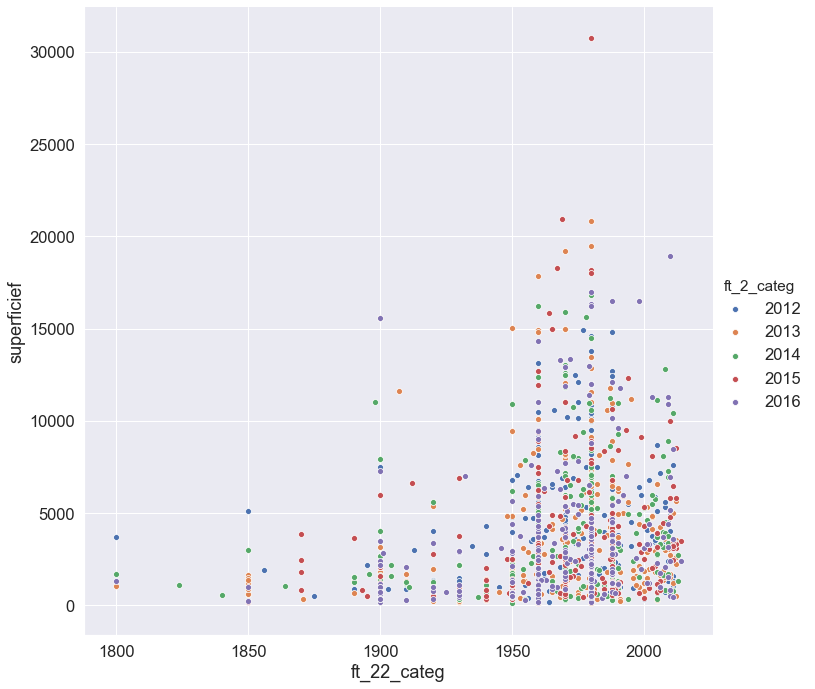

In [47]:
sns.pairplot(claimed_temp,x_vars="ft_22_categ",y_vars="superficief",hue="ft_2_categ",height=10,aspect=1)

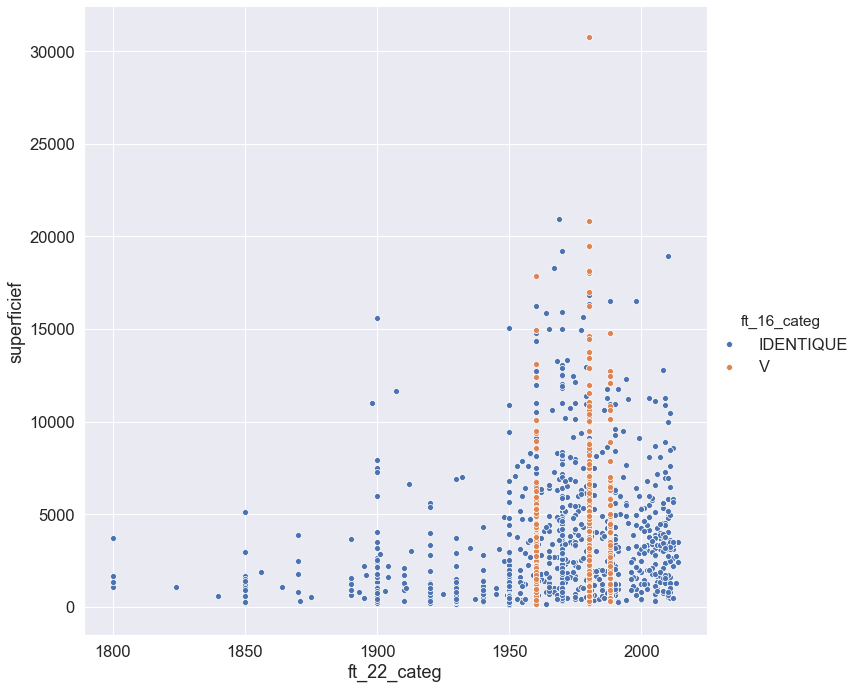

In [62]:
sns.pairplot(claimed_temp,x_vars="ft_22_categ",y_vars="superficief",hue="ft_16_categ",height=10,aspect=1)

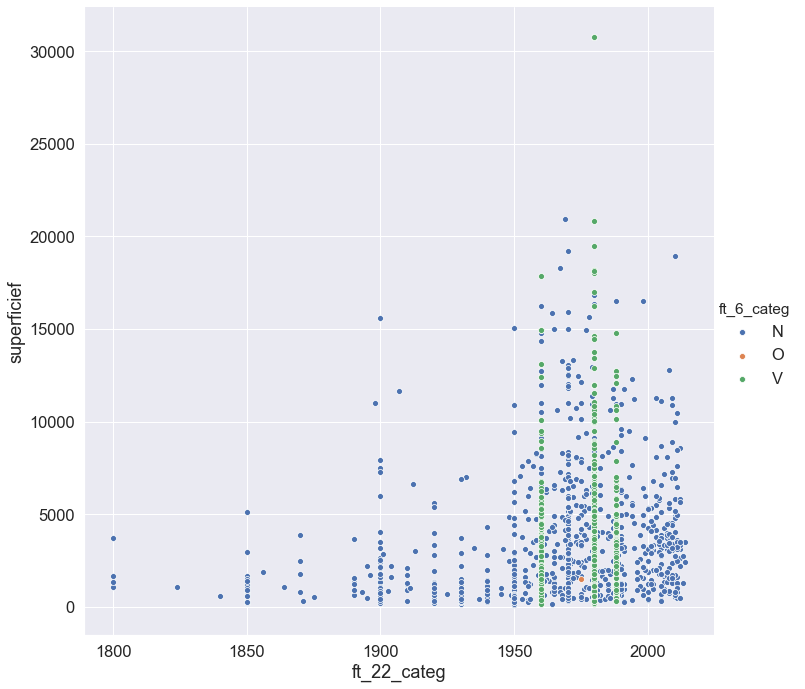

In [64]:
sns.pairplot(claimed_temp,x_vars="ft_22_categ",y_vars="superficief",hue="ft_6_categ",height=10,aspect=1)

In [49]:
users.target.head()

0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64